In [44]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
filepath = lambda x: os.path.join('archive', x) 

In [46]:
for file in os.listdir('archive'):
    print(file)

circuits.csv
constructors.csv
constructor_results.csv
constructor_standings.csv
drivers.csv
driver_standings.csv
lap_times.csv
pit_stops.csv
qualifying.csv
races.csv
results.csv
seasons.csv
sprint_results.csv
status.csv


In [47]:
results = pd.read_csv(filepath('results.csv'))
results = results.replace('\\N', np.NaN)
results['time(s)'] = results.milliseconds.astype(np.float64) / 1000
status = pd.read_csv(filepath('status.csv'))
results = results.merge(status, on='statusId')
results['fastestLap'] = results.fastestLap.replace('\\N', np.NaN).astype(np.float32)
results['retired'] = (results.positionText == 'R').astype(int)
results['disquallified'] = (results.positionText == 'D').astype(int)
results['averageLapTime'] = results['time(s)'] / results.laps
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,time(s),status,retired,disquallified,averageLapTime
0,1,18,1,1,22,1,1,1,1,10.0,...,39.0,2,1:27.452,218.300,1,5690.616,Finished,0,0,98.114069
1,2,18,2,2,3,5,2,2,2,8.0,...,41.0,3,1:27.739,217.586,1,5696.094,Finished,0,0,98.208517
2,3,18,3,3,7,7,3,3,3,6.0,...,41.0,5,1:28.090,216.719,1,5698.779,Finished,0,0,98.254810
3,4,18,4,4,5,11,4,4,4,5.0,...,58.0,7,1:28.603,215.464,1,5707.797,Finished,0,0,98.410293
4,5,18,5,1,23,3,5,5,5,4.0,...,43.0,1,1:27.418,218.385,1,5708.630,Finished,0,0,98.424655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,24883,1043,825,210,20,17,NaN,R,18,0.0,...,45.0,18,1:19.273,222.930,139,NaN,Illness,1,0,NaN
25836,25405,1073,853,210,9,20,NaN,W,20,0.0,...,NaN,0,NaN,NaN,139,NaN,Illness,0,0,NaN
25837,25440,1075,822,51,77,8,NaN,R,15,0.0,...,31.0,14,1:33.979,236.503,141,NaN,Cooling system,1,0,NaN
25838,25624,1084,849,3,6,17,NaN,R,19,0.0,...,14.0,19,1:10.890,219.280,140,NaN,Undertray,1,0,NaN


In [48]:
results[~results.positionText.str.isnumeric()].positionText.value_counts()

R    8805
F    1368
W     330
N     190
D     147
E       9
Name: positionText, dtype: int64

Results
- Different status codes for ranking depending on reason:
- R - Retired, but raced, usually due to an engine failure during race
- F - Not allowed to race due to qualifying related issues (not qualified, 107% rule)
- W - Withdrew - Did not race due to many conditions (engine problems usually)
- D - Disqualified - Disqualified for unspecified reasons
- E - Excluded - not many examples to understand why

In [49]:
circuits = pd.read_csv(filepath('circuits.csv'))
circuits['alt'] = circuits['alt'].replace('\\N', np.NaN).astype(float)
circuits = circuits[['circuitId', 'name']].rename(columns={'name':'circuit_name'})
circuits

,circuitId,circuit_name
0,1,Albert Park Grand Prix Circuit
1,2,Sepang International Circuit
2,3,Bahrain International Circuit
3,4,Circuit de Barcelona-Catalunya
4,5,Istanbul Park
...,...,...
71,75,Autódromo Internacional do Algarve
72,76,Autodromo Internazionale del Mugello
73,77,Jeddah Corniche Circuit
74,78,Losail International Circuit


In [50]:
races = pd.read_csv(filepath('races.csv'))
races['date'] = pd.to_datetime(races['date'])
races = races.drop(columns=['fp1_date', 'fp1_time', 'fp2_date',
       'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'url'])
races = races.rename(columns={'date':'race_start_time', 'time':'start_time', 'name':'race_name'})
races = races.merge(circuits, on='circuitId')
races

,raceId,year,round,circuitId,race_name,race_start_time,start_time,circuit_name
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,Albert Park Grand Prix Circuit
1,18,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,Albert Park Grand Prix Circuit
2,36,2007,1,1,Australian Grand Prix,2007-03-18,03:00:00,Albert Park Grand Prix Circuit
3,55,2006,3,1,Australian Grand Prix,2006-04-02,14:00:00,Albert Park Grand Prix Circuit
4,71,2005,1,1,Australian Grand Prix,2005-03-06,14:00:00,Albert Park Grand Prix Circuit
...,...,...,...,...,...,...,...,...
1074,1054,2021,3,75,Portuguese Grand Prix,2021-05-02,14:00:00,Autódromo Internacional do Algarve
1075,1051,2021,20,78,Qatar Grand Prix,2021-11-21,14:00:00,Losail International Circuit
1076,1072,2021,21,77,Saudi Arabian Grand Prix,2021-12-05,17:30:00,Jeddah Corniche Circuit
1077,1075,2022,2,77,Saudi Arabian Grand Prix,2022-03-27,17:00:00,Jeddah Corniche Circuit


In [51]:
racers = pd.read_csv(filepath('drivers.csv'))
racers['dob'] = pd.to_datetime(racers.dob)
racers.replace('\\N', np.NaN)
racers['driver_name'] = racers.forename + ' ' + racers.surname
racers = racers.drop(columns=['driverRef', 'url', 'forename', 'surname'])
racers

,driverId,number,code,dob,nationality,driver_name
0,1,44,HAM,1985-01-07,British,Lewis Hamilton
1,2,\N,HEI,1977-05-10,German,Nick Heidfeld
2,3,6,ROS,1985-06-27,German,Nico Rosberg
3,4,14,ALO,1981-07-29,Spanish,Fernando Alonso
4,5,\N,KOV,1981-10-19,Finnish,Heikki Kovalainen
...,...,...,...,...,...,...
850,852,22,TSU,2000-05-11,Japanese,Yuki Tsunoda
851,853,9,MAZ,1999-03-02,Russian,Nikita Mazepin
852,854,47,MSC,1999-03-22,German,Mick Schumacher
853,855,24,ZHO,1999-05-30,Chinese,Guanyu Zhou


In [52]:
results_races = results.merge(races, on='raceId').set_index('resultId')
data = results_races.merge(racers, on='driverId')
data[data.raceId == 18][['driver_name', 'time(s)', 'rank', 'race_name', 'year', 'round', 'points']]

,driver_name,time(s),rank,race_name,year,round,points
0,Lewis Hamilton,5690.616,2,Australian Grand Prix,2008,1,10.0
310,Nick Heidfeld,5696.094,3,Australian Grand Prix,2008,1,8.0
494,Nico Rosberg,5698.779,5,Australian Grand Prix,2008,1,6.0
700,Fernando Alonso,5707.797,7,Australian Grand Prix,2008,1,5.0
1058,Heikki Kovalainen,5708.630,1,Australian Grand Prix,2008,1,4.0
1170,Kazuki Nakajima,NaN,14,Australian Grand Prix,2008,1,3.0
1206,Sébastien Bourdais,NaN,12,Australian Grand Prix,2008,1,2.0
1233,Kimi Räikkönen,NaN,4,Australian Grand Prix,2008,1,1.0
1585,Felipe Massa,NaN,6,Australian Grand Prix,2008,1,0.0
1856,Robert Kubica,NaN,9,Australian Grand Prix,2008,1,0.0


In [53]:
data['race_finish_rank'] = data.groupby('raceId')['points'].rank(method='max', ascending=False).astype(int)
data[data.raceId == 18][['driver_name', 'time(s)', 'rank', 'race_name', 'year', 'round', 'points', 'race_finish_rank']]

,driver_name,time(s),rank,race_name,year,round,points,race_finish_rank
0,Lewis Hamilton,5690.616,2,Australian Grand Prix,2008,1,10.0,1
310,Nick Heidfeld,5696.094,3,Australian Grand Prix,2008,1,8.0,2
494,Nico Rosberg,5698.779,5,Australian Grand Prix,2008,1,6.0,3
700,Fernando Alonso,5707.797,7,Australian Grand Prix,2008,1,5.0,4
1058,Heikki Kovalainen,5708.630,1,Australian Grand Prix,2008,1,4.0,5
1170,Kazuki Nakajima,NaN,14,Australian Grand Prix,2008,1,3.0,6
1206,Sébastien Bourdais,NaN,12,Australian Grand Prix,2008,1,2.0,7
1233,Kimi Räikkönen,NaN,4,Australian Grand Prix,2008,1,1.0,8
1585,Felipe Massa,NaN,6,Australian Grand Prix,2008,1,0.0,22
1856,Robert Kubica,NaN,9,Australian Grand Prix,2008,1,0.0,22


https://en.wikipedia.org/wiki/List_of_Formula_One_World_Championship_points_scoring_systems

In [94]:
data[data.raceId.isin(fastest_lap_times.isna().index)]['time(s)']

0        5690.616
1        5525.103
2             NaN
3        5903.238
4        5213.230
           ...   
25835    6207.851
25836         NaN
25837    5943.369
25838         NaN
25839    4834.633
Name: time(s), Length: 25840, dtype: float64

In [91]:
fastest_lap_times[fastest_lap_times.isna()]

raceId
108    NaN
109    NaN
110    NaN
111    NaN
112    NaN
        ..
836    NaN
837    NaN
838    NaN
839    NaN
1063   NaN
Name: fastestLapTimeSec, Length: 714, dtype: float64

In [139]:
def time_to_sec(time):
    if not isinstance(time, str):
        return np.NaN
    
    # Find colon
    col_ind = time.find(':')
    time = float(time[:col_ind]) * 60 + float(time[col_ind + 1:])
    return time

# Get fastest lap time to add bonus point for fastest lap (top 10 only)
fastest_lap_times = data.fillna(np.inf).groupby('raceId')['fastestLapTimeSec'].min()
def apply_fastest_lap(entry):
    if not isinstance(entry['fastestLapTimeSec'], float):
        return 0
    return int(np.abs(entry['fastestLapTimeSec'] - fastest_lap_times.loc[entry['raceId']]) < .001 and entry['race_finish_rank'] <= 10)

In [140]:
data['fastestLapTimeSec'] = data['fastestLapTime'].apply(time_to_sec)

# Points if recorded under 2021
data['points_2021'] = data['race_finish_rank'].map(
    {
        1:25,
        2:18,
        3:15,
        4:12,
        5:10,
        6:8,
        7:6,
        8:4,
        9:2,
        10:1
    }
).fillna(0) + data.apply(apply_fastest_lap, axis=1)
data

,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,...,start_time,circuit_name,number_y,code,dob,nationality,driver_name,race_finish_rank,fastestLapTimeSec,points_2021
0,18,1,1,22,1,1,1,1,10.0,58,...,04:30:00,Albert Park Grand Prix Circuit,44,HAM,1985-01-07,British,Lewis Hamilton,1,87.452,25.0
1,19,1,1,22,9,5,5,5,4.0,56,...,07:00:00,Sepang International Circuit,44,HAM,1985-01-07,British,Lewis Hamilton,5,95.462,10.0
2,20,1,1,22,3,13,13,13,0.0,56,...,11:30:00,Bahrain International Circuit,44,HAM,1985-01-07,British,Lewis Hamilton,22,95.520,0.0
3,21,1,1,22,5,3,3,3,6.0,66,...,12:00:00,Circuit de Barcelona-Catalunya,44,HAM,1985-01-07,British,Lewis Hamilton,3,82.017,15.0
4,22,1,1,22,3,2,2,2,8.0,58,...,12:00:00,Istanbul Park,44,HAM,1985-01-07,British,Lewis Hamilton,2,86.529,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,1093,855,51,24,18,12,12,12,0.0,56,...,19:00:00,Circuit of the Americas,24,ZHO,1999-05-30,Chinese,Guanyu Zhou,20,102.471,0.0
25836,1094,855,51,24,12,13,13,13,0.0,70,...,20:00:00,Autódromo Hermanos Rodríguez,24,ZHO,1999-05-30,Chinese,Guanyu Zhou,20,82.260,0.0
25837,1095,855,51,24,13,12,12,12,0.0,71,...,18:00:00,Autódromo José Carlos Pace,24,ZHO,1999-05-30,Chinese,Guanyu Zhou,20,75.802,0.0
25838,1096,855,51,24,15,12,12,12,0.0,57,...,13:00:00,Yas Marina Circuit,24,ZHO,1999-05-30,Chinese,Guanyu Zhou,20,89.600,0.0


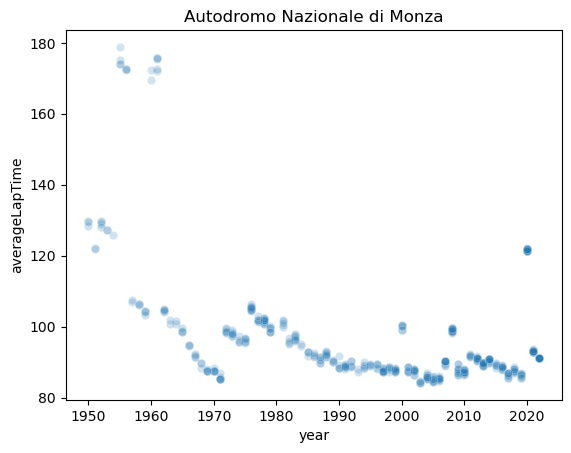

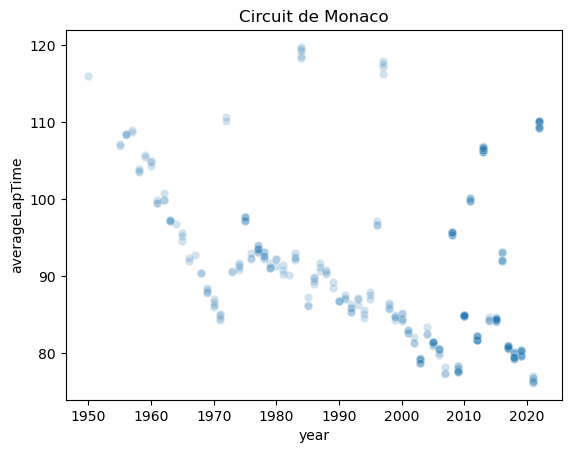

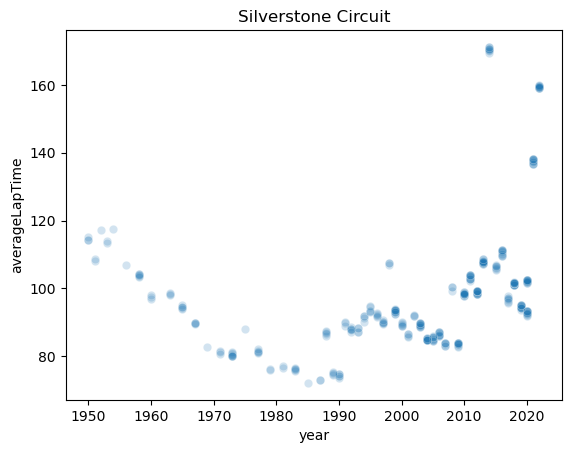

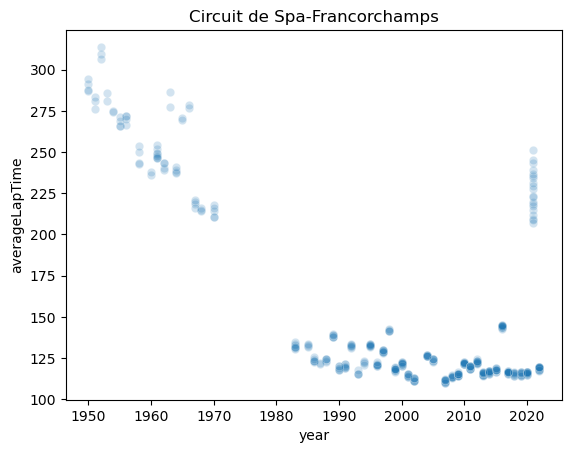

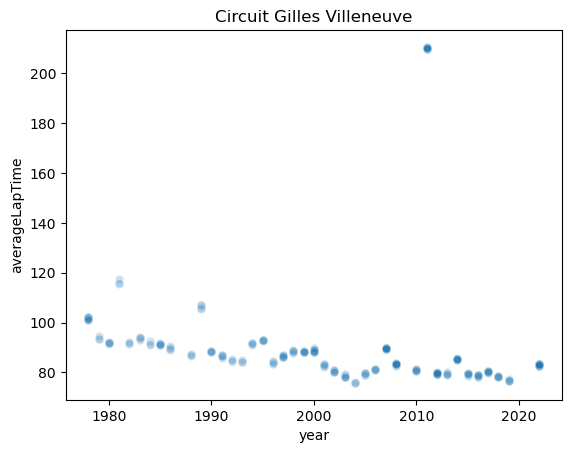

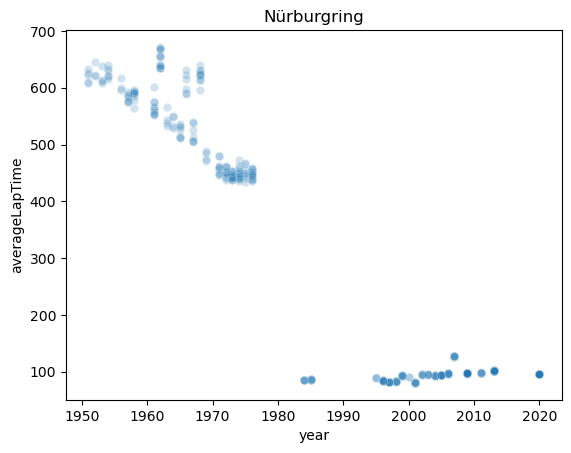

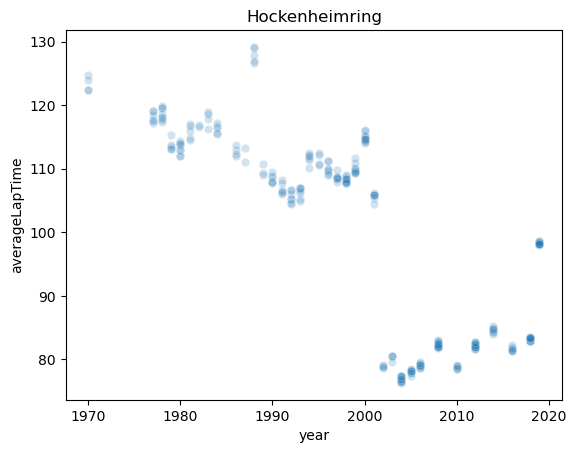

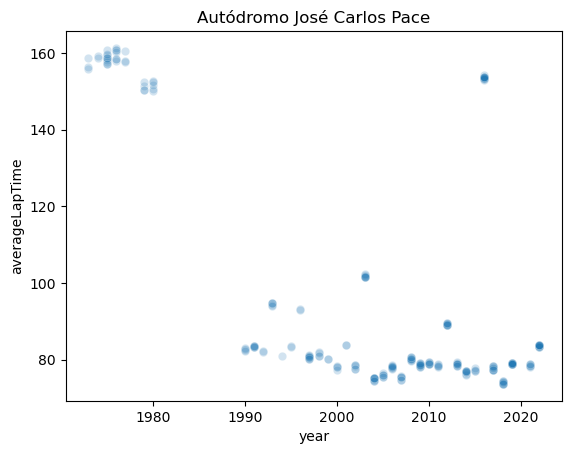

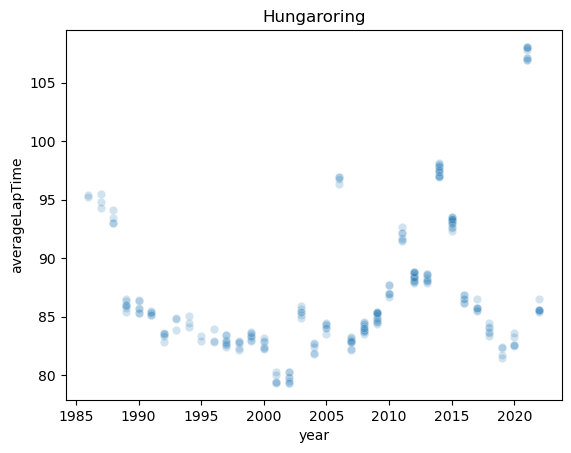

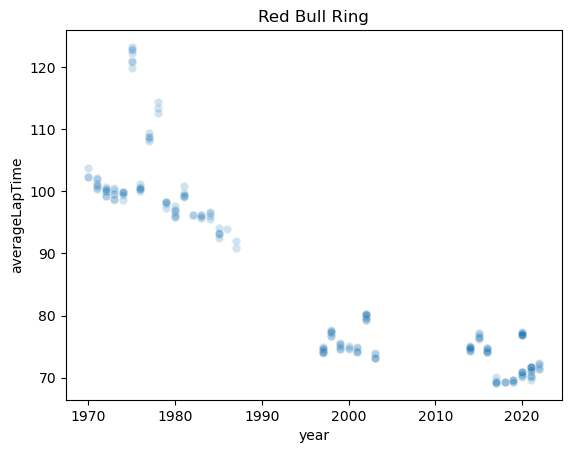

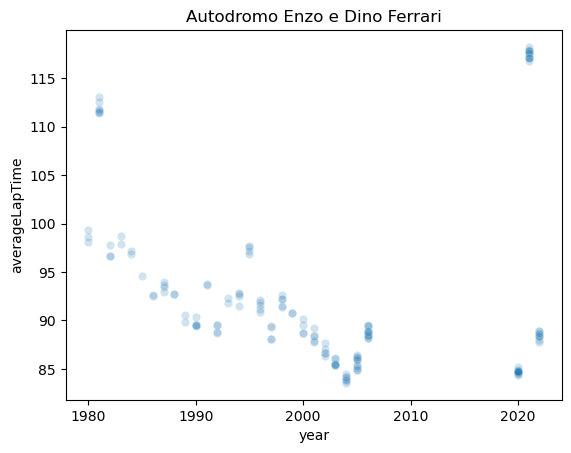

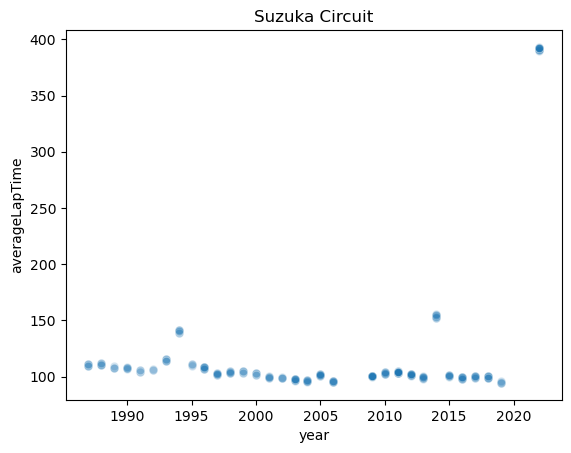

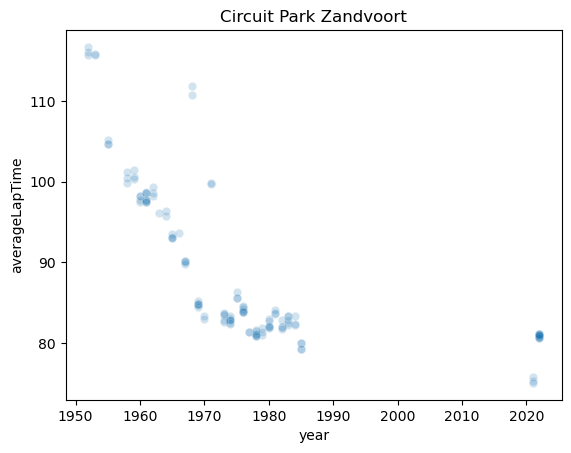

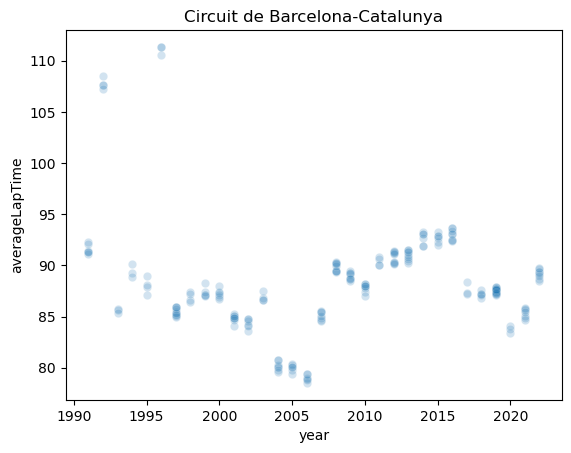

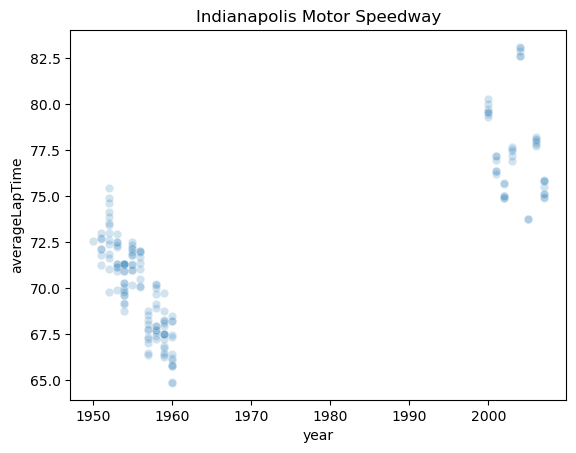

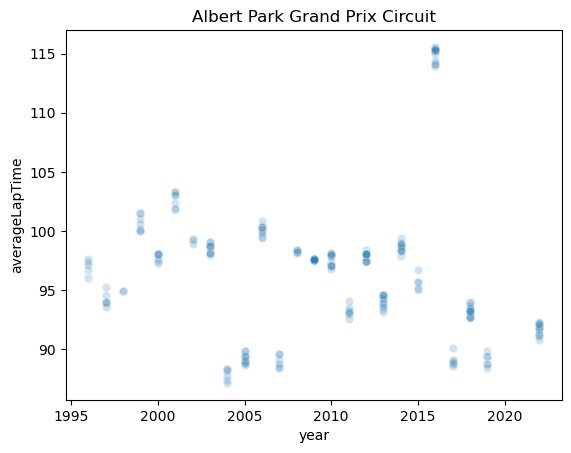

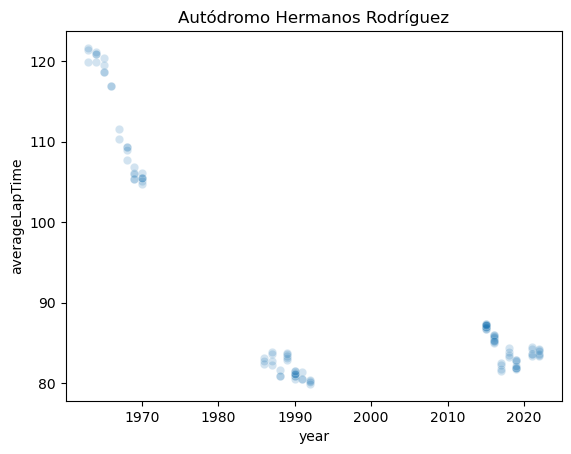

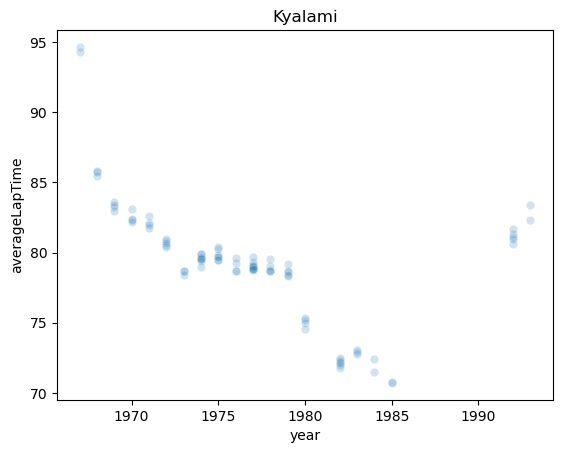

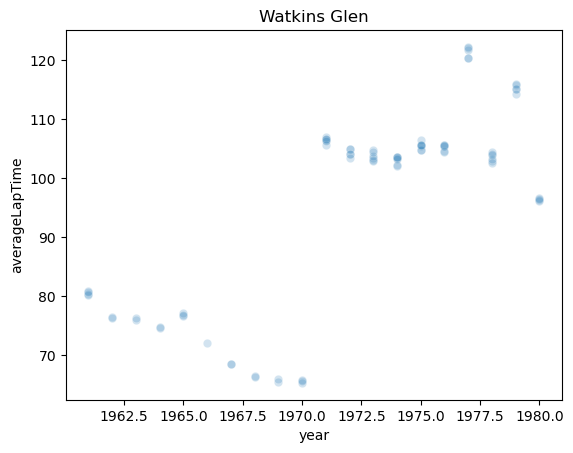

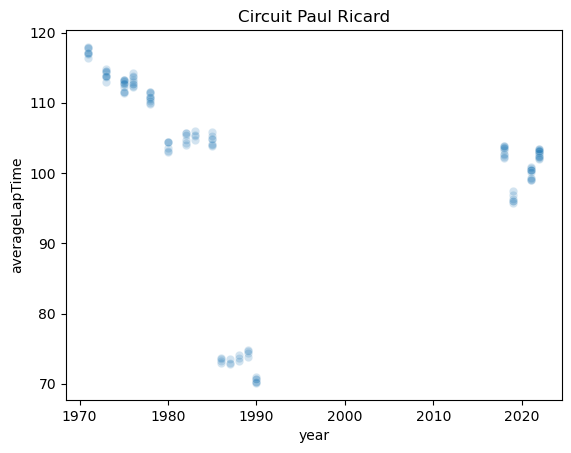

In [141]:
for id in data.groupby('circuit_name').count().sort_values(by='raceId', ascending=False).head(20).index:
    circuit_races = data[data.circuit_name == id]
    plt.figure()
    sns.scatterplot(data=circuit_races, x='year', y='averageLapTime', alpha=.2)
    plt.title(id)

We see that in many different circuits, there are usually two groupings that divide the racers in average lap time. There are also some lapses/gaps in time recordings, but it the graphs show that the average lap time does increase with time. However, there are also some gaps, in which further research shows that the track was rebuilt, indicating that these jumps may correspond with track redesigns.
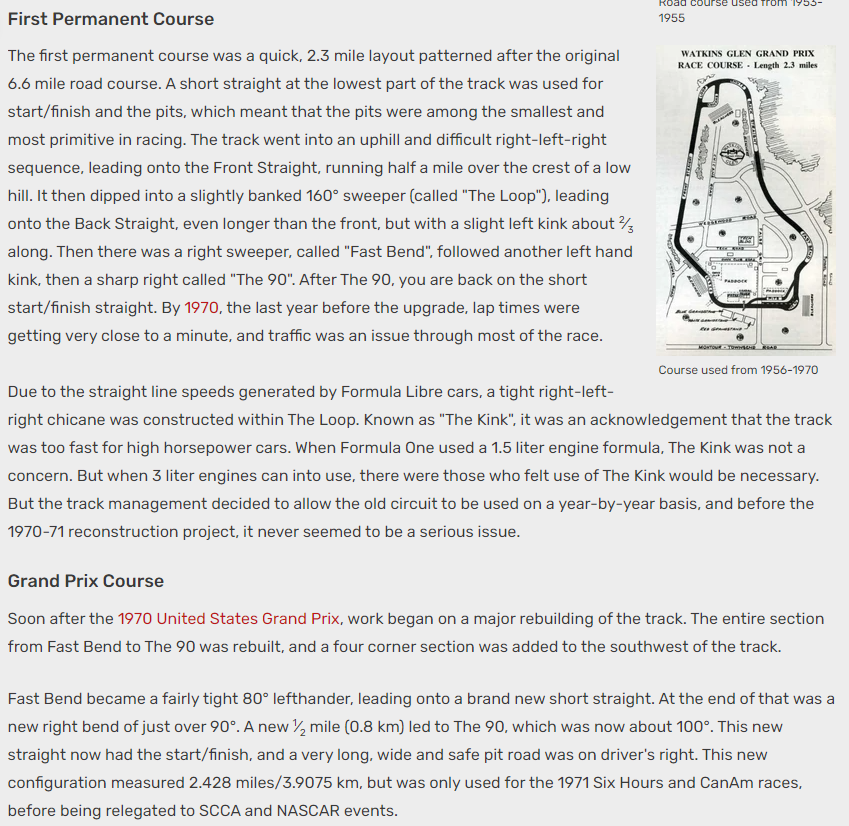

In [131]:
data

,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,...,start_time,circuit_name,number_y,code,dob,nationality,driver_name,race_finish_rank,fastestLapTimeSec,points_2021
0,18,1,1,22,1,1,1,1,10.0,58,...,04:30:00,Albert Park Grand Prix Circuit,44,HAM,1985-01-07,British,Lewis Hamilton,1,87.452,112.452
1,19,1,1,22,9,5,5,5,4.0,56,...,07:00:00,Sepang International Circuit,44,HAM,1985-01-07,British,Lewis Hamilton,5,95.462,105.462
2,20,1,1,22,3,13,13,13,0.0,56,...,11:30:00,Bahrain International Circuit,44,HAM,1985-01-07,British,Lewis Hamilton,22,95.520,95.520
3,21,1,1,22,5,3,3,3,6.0,66,...,12:00:00,Circuit de Barcelona-Catalunya,44,HAM,1985-01-07,British,Lewis Hamilton,3,82.017,97.017
4,22,1,1,22,3,2,2,2,8.0,58,...,12:00:00,Istanbul Park,44,HAM,1985-01-07,British,Lewis Hamilton,2,86.529,104.529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,1093,855,51,24,18,12,12,12,0.0,56,...,19:00:00,Circuit of the Americas,24,ZHO,1999-05-30,Chinese,Guanyu Zhou,20,102.471,102.471
25836,1094,855,51,24,12,13,13,13,0.0,70,...,20:00:00,Autódromo Hermanos Rodríguez,24,ZHO,1999-05-30,Chinese,Guanyu Zhou,20,82.260,82.260
25837,1095,855,51,24,13,12,12,12,0.0,71,...,18:00:00,Autódromo José Carlos Pace,24,ZHO,1999-05-30,Chinese,Guanyu Zhou,20,75.802,75.802
25838,1096,855,51,24,15,12,12,12,0.0,57,...,13:00:00,Yas Marina Circuit,24,ZHO,1999-05-30,Chinese,Guanyu Zhou,20,89.600,89.600


In [132]:
data.fillna(0)['points_2021']

0        112.452
1        105.462
2         95.520
3         97.017
4        104.529
          ...   
25835    102.471
25836     82.260
25837     75.802
25838     89.600
25839     88.624
Name: points_2021, Length: 25840, dtype: float64

In [151]:
# Average point count
driver_points = data.fillna(0).groupby('driver_name')['points_2021'].mean().sort_values(ascending=False)

<AxesSubplot:title={'center':'Average points per race'}, ylabel='driver_name'>

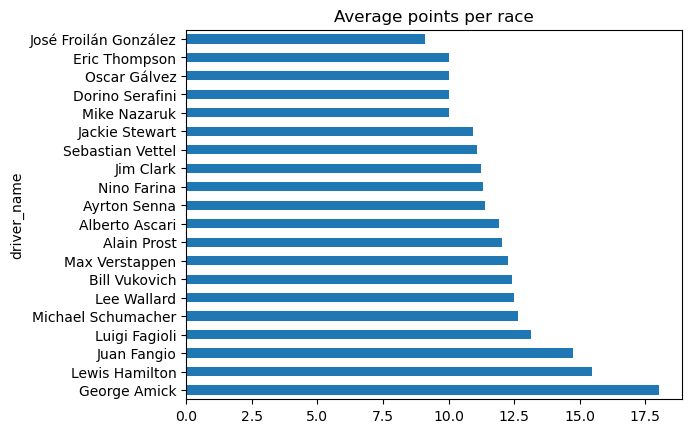

In [150]:
driver_points.head(20).plot(kind='barh', title='Average points per race')

In [152]:
data.columns

Index(['raceId', 'driverId', 'constructorId', 'number_x', 'grid', 'position',
       'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'time(s)', 'status', 'retired',
       'disquallified', 'averageLapTime', 'year', 'round', 'circuitId',
       'race_name', 'race_start_time', 'start_time', 'circuit_name',
       'number_y', 'code', 'dob', 'nationality', 'driver_name',
       'race_finish_rank', 'fastestLapTimeSec', 'points_2021'],
      dtype='object')

In [171]:
races_won = data[data['race_finish_rank'] == 1].groupby('driver_name')['race_finish_rank'].sum()
races_participated = data.groupby('driver_name')['raceId'].count()
# Take drivers that have at least drove in more than 1 race
min_races = 5
races_win_percent = races_won[races_participated > min_races] / races_participated[races_participated > min_races]

In [186]:
driver_races_stats = pd.merge(races_participated, races_won, left_index=True, right_index=True).rename(columns={'raceId': 'Total Races', 'race_finish_rank':'Races Won'})

<AxesSubplot:title={'center':'Driver wins and total races'}, ylabel='driver_name'>

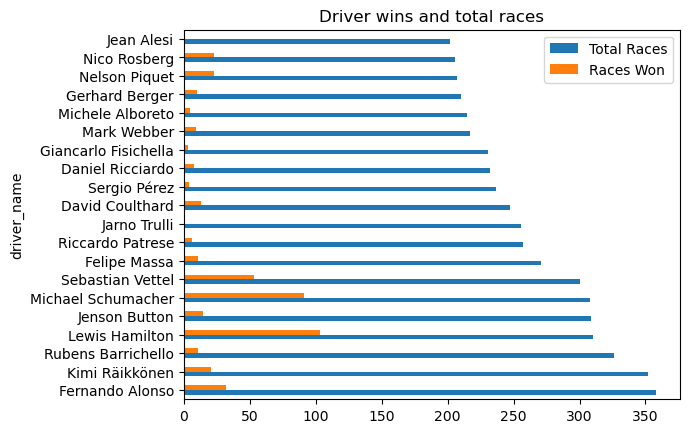

In [188]:
driver_races_stats.sort_values(by='Total Races',ascending=False).head(20).plot(kind='barh', title='Driver wins and total races')

In [176]:
races_participated

driver_name
Adolf Brudes           1
Adolfo Cruz            1
Adrian Sutil         128
Adrián Campos         21
Aguri Suzuki          88
                    ... 
Zsolt Baumgartner     20
Élie Bayol             7
Éric Bernard          47
Érik Comas            63
Óscar González         1
Name: raceId, Length: 855, dtype: int64

In [175]:
races_won

driver_name
Alain Prost           51
Alan Jones            12
Alberto Ascari        13
Alessandro Nannini     1
Ayrton Senna          41
                      ..
Tony Brooks            5
Troy Ruttman           1
Valtteri Bottas       10
Vittorio Brambilla     1
Wolfgang von Trips     2
Name: race_finish_rank, Length: 113, dtype: int32

<AxesSubplot:title={'center':'Race Win percentage'}, ylabel='driver_name'>

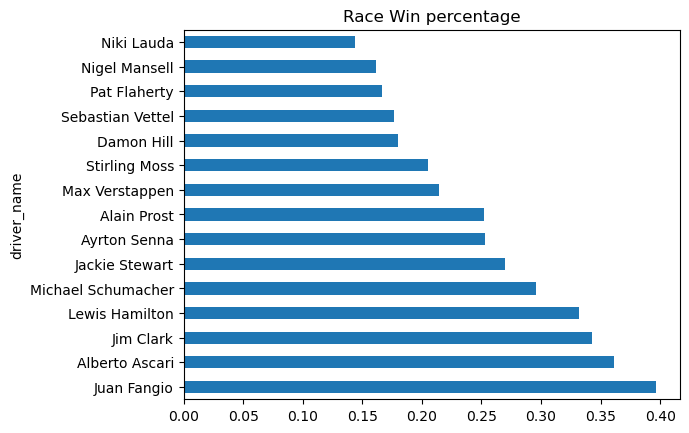

In [173]:
races_win_percent.sort_values(ascending=False).head(15).plot(kind='barh', title='Race Win percentage')

Graph does not count for early retires, if in the year the race counts

## Retirement types